# Phase Space Analysis 
January 27, 2020

In [10]:
#libraries
import math

In [262]:
# Base equation for Taylor-Couette Flow

#CONSTANTS

#viscosity
visc_37 = 0.0035 # Pa*s 
temp_factor = 1.27 # conversion factor from 37 to 22

#angular velocity, [RPM]
w = 1 

#conversion from rad/s to RPM and back
def RPM(rad):
    return rad*30/math.pi
def rad(RPM):
    return RPM*math.pi/30

# r is optional and represents distance from inner to outer (0 to 1)
def shear_Rate(r_i, r_0, w, r=1):
    r = r_i + r*(r_0-r_i)
    out = 2*(r_0**2 * r_i**2 * rad(w))   /   ((r_0**2 - r_i**2) * r**2)
    return out

#same but for calculating RPM
def ang_vel(r_i, r_0, w, r=1):
    r = r_i + r*(r_0-r_i)
    out = rad(w)*((r_0**2 - r_i**2) * r**2) / 2*(r_0**2 * r_i**2 )  
    return out

#sectional surface area 
def surf_Area(r_i, r_0):
    return 2*math.pi*(r_i+r_0) / (10000*math.pi*(r_0**2 - r_i**2))


Testing this with random values

In [95]:
shear_Rate(0.0055,0.00635,297,0)

249.01484453041581

## Goal
Illustrate the capabilities of this Flow for modelling shear-biomaterial interactions. 

### How
Want to produce a phase portrait of: 
- x (shear rate) vs y (surface to volume ratio)
- for a range of radius ratios
- also show the values which lie within the laminar flow regime




Generate
1. A series of outer radii. 
2. A series of ratios between 0 and 1
3. Shear rates that will be tested

In [272]:
import numpy as np
r_outers = np.linspace(0.002,0.020,10)
ratios = np.linspace(0.5,0.95,10)
velos = np.arange(50,5000,500)

Simple case:
outer radius = 0.002

In [263]:
r_outer = r_outers[0]
x = []
y = []
for i in range(0,len(velos)):
    tmp = []
    tmp2 = []
    for j in range(0,len(ratios)):
        tmp.append(shear_Rate(r_outer*ratios[j],r_outer,velos[i]))
        tmp2.append(surf_Area(r_outer*ratios[j],r_outer))
    x.append(tmp)
    y.append(tmp2)

In [273]:
r_outers[1]

0.004

In [284]:
r_outer = r_outers[9]
v = []
w = []
for i in range(0,len(velos)):
    tmp = []
    tmp2 = []
    for j in range(0,len(ratios)):
        tmp.append(shear_Rate(r_outer*ratios[j],r_outer,velos[i]))
        tmp2.append(surf_Area(r_outer*ratios[j],r_outer))
    v.append(tmp)
    w.append(tmp2)

Text(0.5, 0.98, 'Design Space')

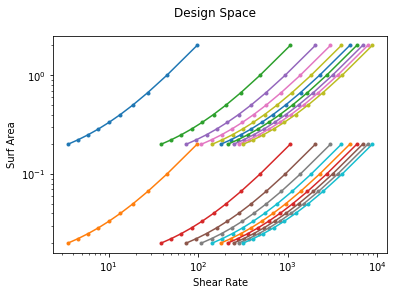

In [287]:
import matplotlib.pyplot as plt

for i in range(0,len(x)):
    plt.plot(x[i],y[i],'.-')
    plt.plot(v[i],w[i],'.-')
plt.show
plt.xlabel('Shear Rate')
plt.ylabel('Surf Area')
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Design Space')

Doesn't work that well. What about "Operating Space": 
- instead of showing how each line as a radius and range of ratios can show: 
    - given physical arrangement and range of velocities

In [127]:
xx,yy,zz = np.meshgrid(r_outers, ratios, s_rates)

In [129]:
grid = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()])

array([[2.00000000e-03, 2.00000000e-03, 2.00000000e-03, 2.00000000e-03,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03, 2.00000000e-03,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03, 2.00000000e-03,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03, 2.00000000e-03,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03, 2.00000000e-03],
       [1.11288889e+00, 1.11288889e+00, 1.11288889e+00, 1.11288889e+00,
        1.11288889e+00, 1.11288889e+00, 1.11288889e+00, 1.11288889e+00,
        1.11288889e+00, 1.11288889e+00, 1.11288889e+00, 1.11288889e+00,
        1.11288889e+00, 1.11288889e+00, 1.11288889e+00, 1.11288889e+00,
        1.11288889e+00, 1.11288889e+00, 1.11288889e+00, 1.11288889e+00],
       [2.22377778e+00, 2.22377778e+00, 2.22377778e+00, 2.22377778e+00,
        2.22377778e+00, 2.22377778e+00, 2.22377778e+00, 2.22377778e+00,
        2.22377778e+00, 2.22377778e+00, 2.22377778e+00, 2.22377778e+00,
        2.22377778e+00, 2.22377778e+00, 2.22377778e+00, 2.2237